In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv1 = pd.read_csv("data\\housePrice.csv")
csv1.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [8]:
from sklearn.preprocessing import LabelEncoder
def cleanData(csv):
    # remove row that doesn't have address
    csv.dropna(subset=['Address'], inplace=True)
    # if area isn't int then convert to int or replace with NAN
    csv['Area'] = pd.to_numeric(csv['Area'], errors='coerce')
    # remove cells that is Empty(NAN)
    csv.dropna(subset=['Area'], inplace=True)
    # remove cells that have more than 1000 meter**2
    csv = csv[csv['Area'] < 1000]

    bool_to_int = ['Parking' , 'Warehouse' ,'Elevator']
    for col in bool_to_int:
        csv[col] = csv[col].astype(int)
    # 1dolor = 150_000 toman
    csv['Price(USD)'] = csv['Price(USD)'] * 5
    # convert address to int
    csv['Address'] = LabelEncoder().fit_transform(csv['Address'])
    return csv

In [9]:
cleanData(csv1)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1.850000e+09,308333.35
1,60.0,1,1,1,1,156,1.850000e+09,308333.35
2,79.0,2,1,1,1,117,5.500000e+08,91666.65
3,95.0,2,1,1,1,152,9.025000e+08,150416.65
4,123.0,2,1,1,1,150,7.000000e+09,1166666.65
...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,163,3.500000e+09,583333.35
3475,83.0,2,1,1,1,105,6.800000e+09,1133333.35
3476,75.0,2,0,0,0,115,3.650000e+08,60833.35
3477,105.0,2,1,1,1,39,5.600000e+09,933333.35


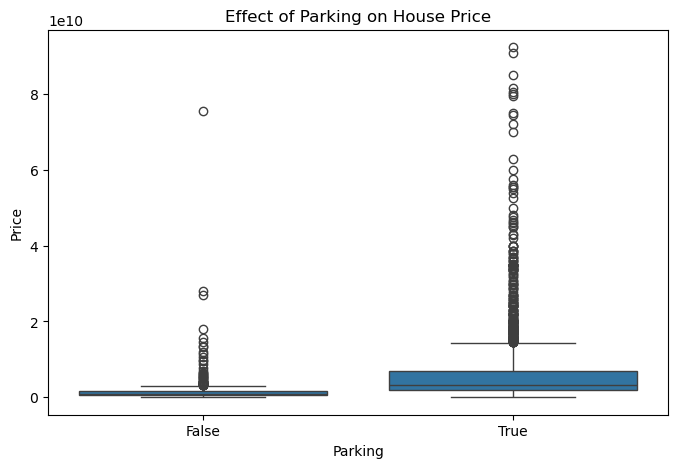

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Parking', y='Price', data=csv1)
plt.title('Effect of Parking on House Price')
plt.show()

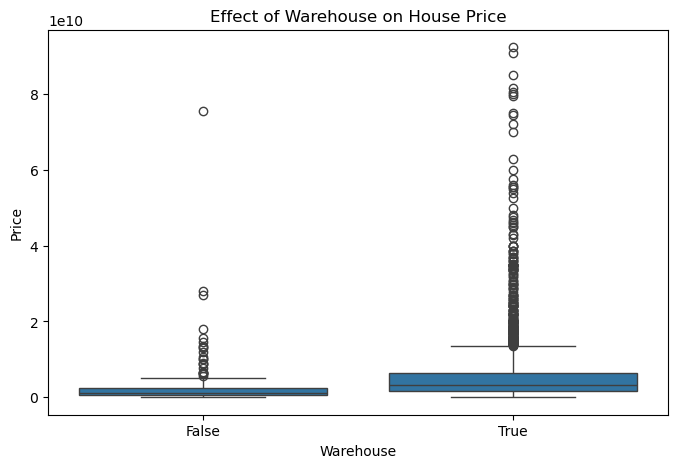

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Warehouse', y='Price', data=csv1)
plt.title('Effect of Warehouse on House Price')
plt.show()

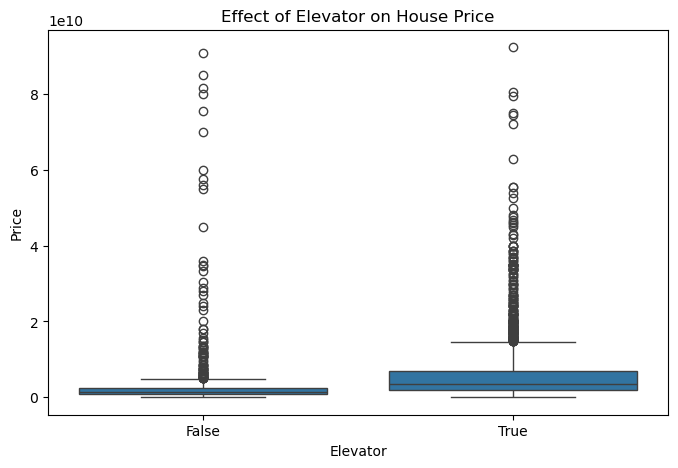

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Elevator', y='Price', data=csv1)
plt.title('Effect of Elevator on House Price')
plt.show()